A goal of supervised learning is to build a model that performs well on new data. If you have new data, you could see how your model performs on it. The problem is that you may not have new data, but you can simulate this experience with a train test split. In this video, I'll show you how train test split works in Scikit-Learn.

## What is `train_test_split`

1. Split the dataset into two pieces: a **training set** and a **testing set**. Typically, about 75% of the data goes to your training set and 25% goes to your test set. 
2. Train the model on the **training set**.
3. Test the model on the **testing set** and evaluate the performance 



## Import Libraries

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## Load the Dataset
The boston house-price dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the boston dataset.

In [5]:
data = california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X = df.loc[:, ['MedInc', 'AveRooms', 'HouseAge']].values

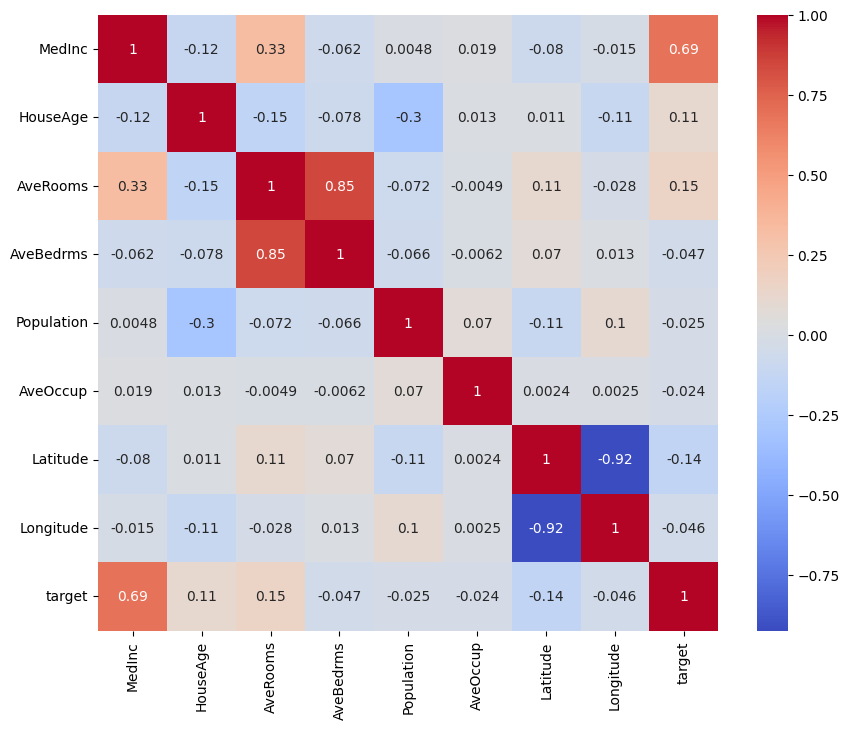

In [8]:
#Select Features Based on Correlation
# First, check correlations with target to select the most relevant features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Then select features with highest correlation to target
# For example, if MedInc, AveRooms, and HouseAge have high correlation:
X = df.loc[:, ['MedInc', 'AveRooms', 'HouseAge']].values

In [7]:
y = df.loc[:, 'target'].values

## Train Test Split 

![images](images/trainTestSplitBoston.png)
The colors in the image indicate which variable (X_train, X_test, y_train, y_test) the data from the dataframe df went to for a particular train test split (not necessarily the exact split of the code below).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

## Linear Regression Model

In [10]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Measuring Model Performance
By measuring model performance on the test set, you can estimate how well your model is likely to perform on new data (out-of-sample data)

In [11]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.5193120072053226


So that's it, train_test_split helps you simulate how well a model would perform on new data